In [1]:
import numpy as np
from forschungspraktikum.jiles_atherton import JilesAthertonModel
from scipy.constants import mu_0

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 7]

# Auswertungen

## Modell initialisieren

In [78]:
# Beispielparameter des Jiles-Atherton-Modells
alpha = 0.0015
a = 100.5
k = 100.0
c = 0.9
Msat = 1e5

# Parametervektor
p = {'alpha': alpha,
     'a': a,
     'k': k,
     'c': c,
     'm_sat': Msat}

model = JilesAthertonModel.from_dict(p)

## Eingangsgrößen

In [79]:
r = 2.0e-2 # m, Radius
i_hat = 20.0 # A, Strom
f = 1000.0 # Hz, Frequenz
n = 5 # Anzahl Perioden
n_p = 1024# Datenpunkte pro Periode

t = np.arange(n * n_p)/(n_p*f) # Zeitvektor
current = i_hat*(np.sin(2*np.pi*f*t)) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe

## Sinusförmige Erregung

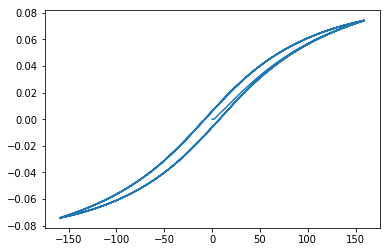

In [80]:
M = model.integrate_rk4(t, H)

# Um die Werte plotten zu können, muss H ausgedünnt werden, für M entsteht nur zu jedem zweiten Zeitschritt ein Wert.
H = H[::2]
t = t[::2]
B = mu_0*(H + M)
dB_dt = np.zeros(np.size(B))
dB_dt[1:] = (B[1:] - B[0:-1]) / (t[1:] - t[0:-1])
b_h_curve = plt.plot(H, B)

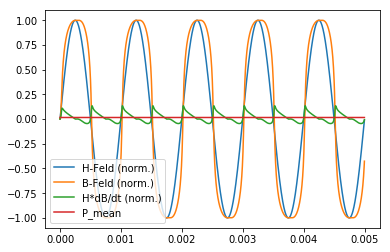

In [6]:
plot_h, = plt.plot(t, H/np.max(H), label="H-Feld (norm.)")
plot_b, = plt.plot(t, B/np.max(B), label="B-Feld (norm.)")
plot_w, = plt.plot(t, H*dB_dt/(np.max(dB_dt)*np.max(H)), label="H*dB/dt (norm.)")
plot_x, = plt.plot(t, np.ones(np.size(B))*np.mean(H*dB_dt/(np.max(dB_dt)*np.max(H))), label="P_mean")
plt.legend(handles=[plot_h, plot_b, plot_w, plot_x])

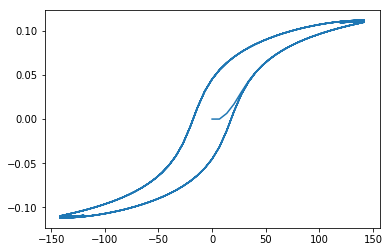

In [7]:
current = i_hat*(np.sin(2*np.pi*f*t)+0.25*np.sin(6*np.pi*f*t)) # Stromvorgabe
H = current/(2*np.pi*r) # Resultierende Feldvorgabe
M = model.integrate_rk4(t, H)

# Um die Werte plotten zu können, muss H ausgedünnt werden, für M entsteht nur zu jedem zweiten Zeitschritt ein Wert.
H = H[::2]
t = t[::2]
B = mu_0*(H + M)
dB_dt = np.zeros(np.size(B))
dB_dt[1:] = (B[1:] - B[0:-1]) / (t[1:] - t[0:-1])
b_h_curve = plt.plot(H, B)

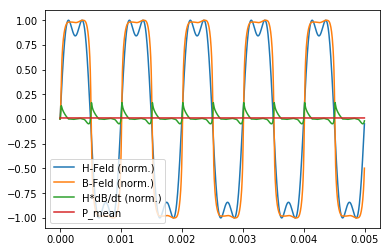

In [8]:
plot_h, = plt.plot(t, H/np.max(H), label="H-Feld (norm.)")
plot_b, = plt.plot(t, B/np.max(B), label="B-Feld (norm.)")
plot_w, = plt.plot(t, H*dB_dt/(np.max(dB_dt)*np.max(H)), label="H*dB/dt (norm.)")
plot_x, = plt.plot(t, np.ones(np.size(B))*np.mean(H*dB_dt/(np.max(dB_dt)*np.max(H))), label="P_mean")
plt.legend(handles=[plot_h, plot_b, plot_w, plot_x])